In [91]:
import sys, os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from tbparse import SummaryReader
from torch_ac.utils import DictList

In [19]:
def sorted_listdir(path):
    files = sorted((f for f in os.listdir(path) if not f.startswith(".")), key=str.lower)
    return files

In [113]:
args = {}
args = DictList(args)

args.date = '2023-01-19'
args.approach = 'blip'
args.experiment = 'minigrid-tb-blip-5e5-doorkey-wallgap-lavagap-redbluedoor'
args.seed = 1
args.F_prior = 5e-18



if args.approach == 'fine-tuning' or args.approach == 'ft-fix':
    log_name = '{}_{}_{}_{}'.format(args.date, args.experiment, args.approach,args.seed)
elif args.approach == 'ewc' in args.approach:
    log_name = '{}_{}_{}_{}_lamb_{}'.format(args.date, args.experiment, args.approach, args.seed, args.ewc_lambda)
elif args.approach == 'blip':
    log_name = '{}_{}_{}_{}_F_prior_{}'.format(args.date, args.experiment, args.approach, args.seed, args.F_prior)



train_dir = os.path.join("./result_data/", log_name, "train")
event_file = os.path.join(train_dir, sorted_listdir(train_dir)[0])
print(event_file)

./result_data/2023-01-19_minigrid-tb-blip-5e5-doorkey-wallgap-lavagap-redbluedoor_blip_1_F_prior_5e-18/train/events.out.tfevents.1674145242.inigo.home.34278.0


In [114]:
reader = SummaryReader(event_file)
df = reader.scalars
df_mean = df[df['tag'] == 'mean_reward']
df_std = df[df['tag'] == 'std']
df_min = df[df['tag'] == 'min_reward']
df_max = df[df['tag'] == 'max_reward']

[Text(0, 0.5, 'value'), Text(0.5, 1.0, 'Mean reward')]

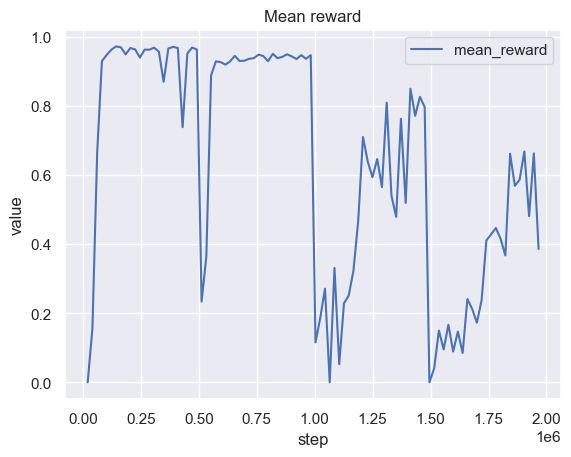

In [126]:
g = sns.lineplot(data=df_mean, x='step', y='value')

g.legend(['mean_reward'])
g.set(ylabel='value', title='Mean reward')

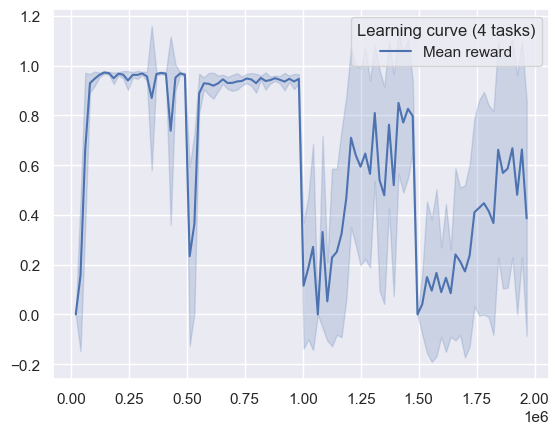

In [97]:
sns.set()
x = df_mean.step
mean_arr = np.array(df_mean.value)
std_arr = np.array(df_std.value)
min_arr = np.array(df_min.value)
max_arr = np.array(df_max.value)

plt.plot(x, mean_arr, 'b-', label='Mean reward')
plt.fill_between(x, mean_arr - std_arr, mean_arr + std_arr, color='b', alpha=0.2)

plt.legend(title='Learning curve (4 tasks)')
plt.show()

In [107]:
train_dir = "/Users/inigo/Documents/cursos/Data Science/master_viu/work/tfm-experiments/BLIP/RL/tmp/log/MiniGrid-DoorKey-6x6-v0_PPO_Adam_1"
event_file = os.path.join(train_dir, sorted_listdir(train_dir)[0])
print(event_file)

/Users/inigo/Documents/cursos/Data Science/master_viu/work/tfm-experiments/BLIP/RL/tmp/log/MiniGrid-DoorKey-6x6-v0_PPO_Adam_1/events.out.tfevents.1674211144.inigo.home.93888.0


In [108]:
reader = SummaryReader(event_file)
df = reader.scalars
pd.unique(df['tag'])
df_mean = df[df['tag'] == 'rollout/ep_rew_mean']

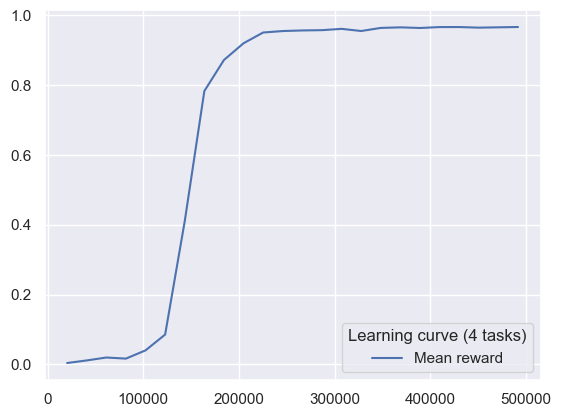

In [110]:
sns.set()
x = df_mean.step
mean_arr = np.array(df_mean.value)

plt.plot(x, mean_arr, 'b-', label='Mean reward')
#plt.fill_between(x, mean_arr - std_arr, mean_arr + std_arr, color='b', alpha=0.2)

plt.legend(title='Learning curve (4 tasks)')
plt.show()